# IMPORTING

In [1]:
import numpy as np
import pandas as pd
import re #regular expression help us find or replace certain expresions 
import string #help in preprocessing 
 
#plotting
import matplotlib.pyplot as plt
import seaborn as sns #used for data visualization with matplotlib
from wordcloud import WordCloud

#nltk
import nltk #like a natural language processing toolkit
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer #used for stemming 
from nltk.tokenize import RegexpTokenizer #used for tokenisation

#sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# READING THE DATASET

In [2]:
dataset = pd.read_csv("Twitter Sentiments.csv") #to read our dataset easily we labelled it as dataset

In [3]:
dataset #to show the dataset

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


# EXPLORING DATASET

In [4]:
#top five
dataset.head() #returns the first n rows for the object based on position

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
#columns in dataset
dataset.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [6]:
#length of dataset
print('length of data is', len(dataset))

length of data is 31962


In [7]:
#shape of data 
dataset. shape

(31962, 3)

In [8]:
#datatypes of all columns
dataset.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [9]:
#tells us about the summary of our dataset
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [10]:
#checking for null values
np.sum(dataset.isnull().any(axis=1))

0

In [11]:
#to see the rows and columns in dataset
print('Count of columns in the data is:  ', len(dataset.columns))
print('Count of rows in the data is:  ', len(dataset))

Count of columns in the data is:   3
Count of rows in the data is:   31962


In [12]:
#to check unique id values
dataset['id'].unique()

array([    1,     2,     3, ..., 31960, 31961, 31962], dtype=int64)

# DATA VISUALISATION OF LABEL VARIABLES

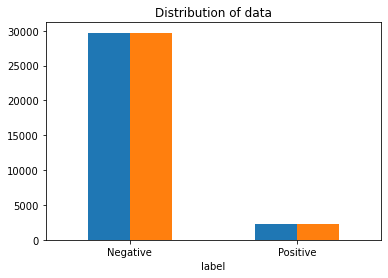

In [13]:
# Plotting the distribution for dataset.
ax = dataset.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(dataset['tweet']), list(dataset['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

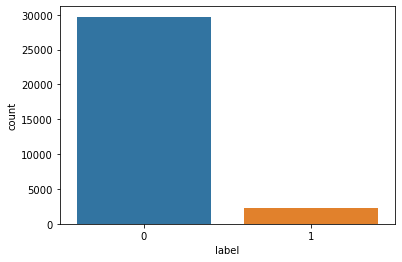

In [14]:
#by using seaborn
sns.countplot(x='label', data=dataset)

# PRE PROCESSING DATASET


In [15]:
#starting the preprocessing by removing the twitter handles by using the following function and loop
# removes pattern in the input text
def remove_the_pattern(input_txt, pattern): #based on given input the pattern will be removed 
    r = re.findall(pattern, input_txt) #findall the patterns
    for word in r:
        input_txt = re.sub(word, "", input_txt) #replace the word by empty text
    return input_txt

In [16]:
#made a new column by the name of clean tweets where the tweets without the user handles ie @user will be there 
#vectorise will pass each row to our function
dataset['clean_tweet_id'] = np.vectorize(remove_the_pattern)(dataset['tweet'], "@[\w]*") 


In [17]:
dataset.head()

,id,label,tweet,clean_tweet_id
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [18]:
dataset

,id,label,tweet,clean_tweet_id
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


In [19]:
#just as we removed the twitter handles now we are removing the special characters, punctuations and numbers
dataset['clean_tweet'] = dataset['clean_tweet_id'].str.replace("[^a-z A-Z #]", " ")
dataset.head()

,id,label,tweet,clean_tweet_id,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now #motivation


In [20]:
#removing the other short words
#we have created lambda function where x is argument 
#then we iterate every word and if the length is greater than 3 then it will be added to string
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
dataset.head()

,id,label,tweet,clean_tweet_id,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society #motivation


In [21]:
#selecting our clean tweets and label for further experimentation
data=dataset[['clean_tweet','label']]

In [22]:
#assigning values to positive sentiment 
data['label'] = data['label'].replace(4,1)
data.head()

,clean_tweet,label
0,when father dysfunctional selfish drags kids i...,0
1,thanks #lyft credit cause they offer wheelchai...,0
2,bihday your majesty,0
3,#model love take with time,0
4,factsguide society #motivation,0


In [23]:
#printing the unique values in our label column 
data['label'].unique()

array([0, 1], dtype=int64)

In [24]:
#separting the positive and the negative tweets
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [25]:
#taking lesser data (one fourth) for better understanding 
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [26]:
#combing the positive and the negative tweets
datas= pd.concat([data_pos, data_neg])

In [27]:
#changing the text into lower case
datas['clean_tweet']=dataset['clean_tweet'].str.lower()
datas['clean_tweet'].tail()

21482       finding life inside illusion lack other choice
21483    there some cold heaed people this world that w...
21484    basically incompetent mental retardo losing se...
21486    fuck land boat motherfucker #lonelyisland #imo...
21487    #altwaystoheal #healthy #peace think alternati...
Name: clean_tweet, dtype: object

In [28]:
#defining the stopwords
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [29]:
#cleaning the tweets ie removing the above stopwords 
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda text: cleaning_stopwords(text))
dataset['clean_tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks #lyft credit cause offer wheelchair van...
2                                       bihday majesty
3                                #model love take time
4                       factsguide society #motivation
Name: clean_tweet, dtype: object

In [30]:
#removing the punctuations 
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['clean_tweet']= dataset['clean_tweet'].apply(lambda x: cleaning_punctuations(x))
dataset['clean_tweet'].tail()

31957                                                youuu
31958    nina turner airwaves trying wrap mantle genuin...
31959                  listening songs monday morning work
31960          sikh temple vandalised calgary wso condemns
31961                                         thank follow
Name: clean_tweet, dtype: object

In [31]:
#removing the repeating words
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x: cleaning_repeating_char(x))
dataset['clean_tweet'].tail()

31957                                                youuu
31958    nina turner airwaves trying wrap mantle genuin...
31959                  listening songs monday morning work
31960          sikh temple vandalised calgary wso condemns
31961                                         thank follow
Name: clean_tweet, dtype: object

In [32]:
#after this we will now split the whole sentence into individual words known as tokens
tokenized_tweet = dataset['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, lyft, credit, cause, offer, wheelchai...
2                                    [bihday, majesty]
3                            [model, love, take, time]
4                    [factsguide, society, motivation]
Name: clean_tweet, dtype: object

In [33]:
#using stemming 
#initialised stemmer 
stemmer = PorterStemmer()
#sentence signifies the entire argument
#for each word in sentence we are going to stem the word.
#stemming narrows down into one common word 
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()


0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, lyft, credit, caus, offer, wheelchair,...
2                                    [bihday, majesti]
3                            [model, love, take, time]
4                          [factsguid, societi, motiv]
Name: clean_tweet, dtype: object

In [34]:
#applying lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x: lemmatizer_on_text(x))
dataset['clean_tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cause offer wheelchair vans...
2                                       bihday majesty
3                                 model love take time
4                        factsguide society motivation
Name: clean_tweet, dtype: object

In [35]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = "".join(tokenized_tweet[i]) #combining all into single line
    
dataset['clean_tweet'] = tokenized_tweet
dataset.head()

,id,label,tweet,clean_tweet_id,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,fatherdysfunctselfishdragkiddysfunctrun
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...,thanklyftcreditcausofferwheelchairvandisapoint...
2,3,0,bihday your majesty,bihday your majesty,bihdaymajesti
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,modellovetaketime
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguidsocietimotiv


In [36]:
!pip install wordcloud

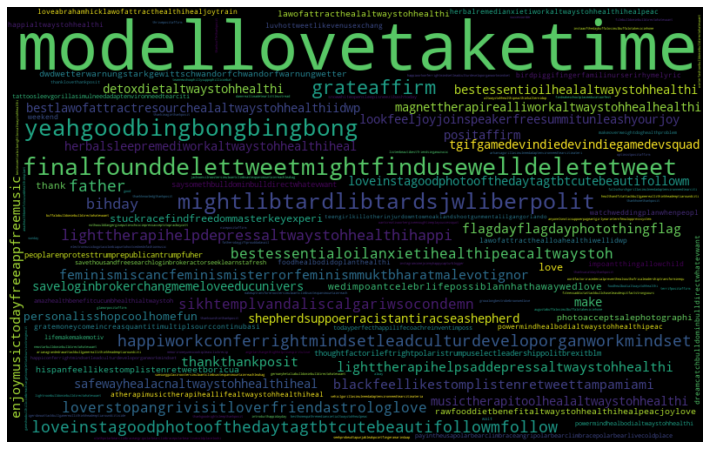

In [37]:
# visualize the frequently used words
all_words = " ".join([sentence for sentence in dataset['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

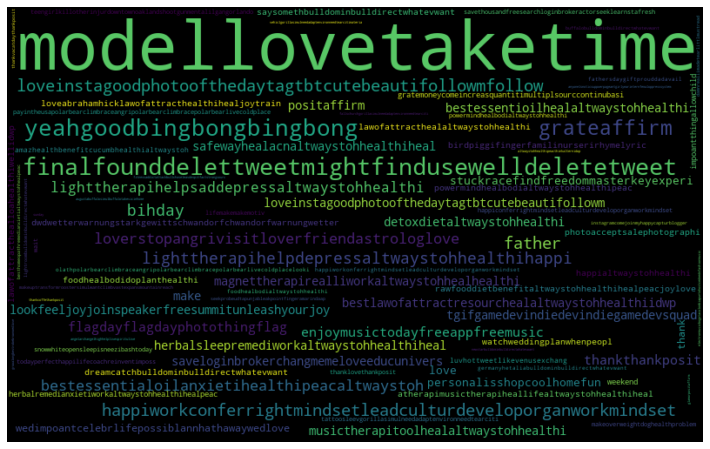

In [38]:

# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in dataset['clean_tweet'][dataset['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

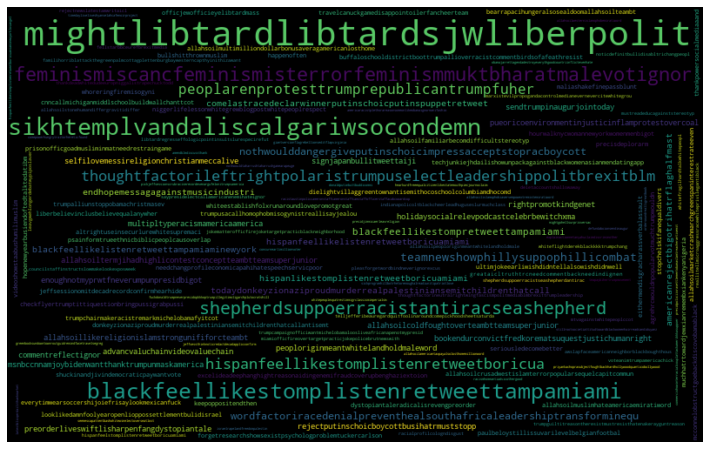

In [39]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in dataset['clean_tweet'][dataset['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags  

In [41]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(dataset['clean_tweet'][dataset['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(dataset['clean_tweet'][dataset['label']==1])

In [42]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [43]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count


In [44]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1080x648 with 0 Axes>

In [45]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count


In [46]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1080x648 with 0 Axes>

# SPLITTING OUR DATA INTO TRAIN AND TEST SUBSET

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(dataset,dataset,test_size = 0.05, random_state =2600000)

# Transforming Dataset using TF-IDF Vectorizer

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(dataset['clean_tweet'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, dataset['label'], random_state=42, test_size=0.25)

# MODEL TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
pred_prob[0][1] >= 0.3